<a href="https://colab.research.google.com/github/bkabhilash0/Credit_Score_Classification/blob/main/Credit_Score_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
 !pip install -q kaggle

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
kaggle_creds_path = "/content/drive/MyDrive/kaggle"

In [19]:
from google.colab import files

In [20]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abhilashbk","key":"f65ae7707cfa180fba2e47de6af6ddd7"}'}

In [21]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [22]:
! cp kaggle.json ~/.kaggle/

In [23]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [24]:
! kaggle datasets list

ref                                                        title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023                    Most Streamed Spotify Songs 2023                 47KB  2023-08-26 11:04:57          17512        552  1.0              
joebeachcapital/students-performance                       Students Performance                              2KB  2023-08-31 00:50:11           6288        158  1.0              
mexwell/motorbike-marketplace                              🏍️ Motorbike Marketplace                          2MB  2023-09-18 05:51:56            942         25  1.0              
iamsouravbanerjee/airline-dataset                          Airline Dataset                               

In [25]:
! kaggle datasets download -d 'parisrohan/credit-score-classification'

 84% 8.00M/9.51M [00:00<00:00, 81.1MB/s]
100% 9.51M/9.51M [00:00<00:00, 89.3MB/s]


In [26]:
import zipfile
zip_ref = zipfile.ZipFile('credit-score-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

## Start with the Analysis

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [28]:
data = pd.read_csv("train.csv");

<ipython-input-28-5fe6ceb8ffbd>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("train.csv");


In [29]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [33]:
data.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [34]:
data.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [89]:
cols = data.columns

28

## Drop Unnecessary Columns

In [90]:
data.drop(['ID', 'Customer_ID', 'Name', 'SSN'],axis=1,inplace=True)

## Find all Categorical Columns and Values

In [135]:
def showCategoricalVariables():
  categorical_data = {'column':[],'No of Unique Values':[],'Values':[]}
  for col in data.select_dtypes('object').columns:
    categorical_data['column'] += [col]
    categorical_data['No of Unique Values'] += [len(data[col].value_counts())]
    categorical_data['Values'] += [list(data[col].value_counts().index)]
  return pd.DataFrame(categorical_data)

In [136]:
showCategoricalVariables()

,column,No of Unique Values,Values
0,Month,8,"[January, February, March, April, May, June, J..."
1,Age,1788,"[38, 28, 31, 26, 32, 25, 36, 35, 34, 27, 39, 4..."
2,Occupation,16,"[_______, Lawyer, Architect, Engineer, Scienti..."
3,Annual_Income,18940,"[36585.12, 20867.67, 17273.83, 9141.63, 33029...."
4,Num_of_Loan,434,"[3, 2, 4, 0, 1, 6, 7, 5, -100, 9, 8, 2_, 4_, 3..."
5,Type_of_Loan,6260,"[Not Specified, Credit-Builder Loan, Personal ..."
6,Num_of_Delayed_Payment,749,"[19, 17, 16, 10, 18, 15, 20, 12, 9, 8, 11, 14,..."
7,Changed_Credit_Limit,4384,"[_, 8.22, 11.5, 11.32, 7.35, 10.06, 8.23, 11.4..."
8,Credit_Mix,4,"[Standard, Good, _, Bad]"
9,Outstanding_Debt,13178,"[1360.45, 460.46, 1151.7, 1109.03, 467.7, 395...."


## Remove Spaces and _ from the columns

In [178]:
def removeCharacter(data,char=" "):
  if(type(data) is not str):
    return data
  cleaned = data.strip(char)
  cleaned = data.strip()
  if(len(cleaned) > 0):
    return cleaned
  else:
    return np.nan

In [169]:
from pandas.core.ops.array_ops import isna
# "".isnumeric

for i in data['Type_of_Loan'].unique():
  if(isna(i)):
    print(i)

nan


In [179]:
data.select_dtypes('object').columns

# type(data['Type_of_Loan'][0])
for col in data.columns:
  data[col] = data[col].apply(removeCharacter,args=("_"))

In [180]:
showCategoricalVariables()

,column,No of Unique Values,Values
0,Month,8,"[January, February, March, April, May, June, J..."
1,Age,1728,"[38, 28, 31, 26, 32, 36, 35, 25, 27, 39, 34, 4..."
2,Occupation,15,"[Lawyer, Architect, Engineer, Scientist, Mecha..."
3,Annual_Income,13487,"[17816.75, 22434.16, 40341.16, 17273.83, 10994..."
4,Num_of_Loan,414,"[3, 2, 4, 0, 1, 6, 7, 5, -100, 9, 8, 1150, 122..."
5,Type_of_Loan,6260,"[Not Specified, Credit-Builder Loan, Personal ..."
6,Num_of_Delayed_Payment,711,"[19, 17, 16, 10, 15, 18, 20, 12, 9, 8, 11, 14,..."
7,Changed_Credit_Limit,4383,"[8.22, 11.5, 11.32, 10.06, 7.35, 8.23, 11.49, ..."
8,Credit_Mix,3,"[Standard, Good, Bad]"
9,Outstanding_Debt,12203,"[1109.03, 1151.7, 1360.45, 460.46, 1058.13, 14..."


## Cast the Required Attributes to the required Datatype

In [193]:
cat_to_num = ['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit','Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']
data[cat_to_num] = data[cat_to_num].astype('float64')

In [194]:
showCategoricalVariables()

,column,No of Unique Values,Values
0,Month,8,"[January, February, March, April, May, June, J..."
1,Occupation,15,"[Lawyer, Architect, Engineer, Scientist, Mecha..."
2,Type_of_Loan,6260,"[Not Specified, Credit-Builder Loan, Personal ..."
3,Credit_Mix,3,"[Standard, Good, Bad]"
4,Credit_History_Age,404,"[15 Years and 11 Months, 19 Years and 4 Months..."
5,Payment_of_Min_Amount,3,"[Yes, No, NM]"
6,Payment_Behaviour,7,"[Low_spent_Small_value_payments, High_spent_Me..."
7,Credit_Score,3,"[Standard, Poor, Good]"


In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  float64
 2   Occupation                92938 non-null   object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  float64
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   float64
 12  Changed_Credit_Limit      97909 non-null   float64
 13  Num_Credit_Inquiries      98035 non-null   fl

## Check the Missing Values

In [202]:
def showMissingStats(cols):
  missing_stats_dict = {'column':[],'count':[],'% of Missing Values':[]}
  for col in cols:
    t = data[col].isna().sum()
    missing_stats_dict['column'] += [col]
    missing_stats_dict['count'] += [t]
    missing_stats_dict['% of Missing Values'] += [(t/len(data) * 100)];
    missing_stats = pd.DataFrame(missing_stats_dict)
  return missing_stats[missing_stats['% of Missing Values'] > 0].sort_values(by="% of Missing Values",ascending=False)

In [203]:
showMissingStats(data.columns)

,column,count,% of Missing Values
14,Credit_Mix,20195,20.195
4,Monthly_Inhand_Salary,15002,15.002
9,Type_of_Loan,11408,11.408
17,Credit_History_Age,9030,9.030
2,Occupation,7062,7.062
11,Num_of_Delayed_Payment,7002,7.002
20,Amount_invested_monthly,4479,4.479
12,Changed_Credit_Limit,2091,2.091
13,Num_Credit_Inquiries,1965,1.965
22,Monthly_Balance,1200,1.200


In [204]:
showMissingStats(data.select_dtypes(exclude="object").columns)

,column,count,% of Missing Values
2,Monthly_Inhand_Salary,15002,15.002
8,Num_of_Delayed_Payment,7002,7.002
14,Amount_invested_monthly,4479,4.479
9,Changed_Credit_Limit,2091,2.091
10,Num_Credit_Inquiries,1965,1.965
15,Monthly_Balance,1200,1.200


In [206]:
showMissingStats(data.select_dtypes("object").columns)

,column,count,% of Missing Values
3,Credit_Mix,20195,20.195
2,Type_of_Loan,11408,11.408
4,Credit_History_Age,9030,9.030
1,Occupation,7062,7.062


## Some Age Values are below 0 and above 100, lets Drop those Values

In [212]:
data.select_dtypes(exclude="object").describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,1.106497e+02,6.862447e+02,-5.000000e+02,24.000000,33.000000,42.000000,8.698000e+03
Annual_Income,100000.0,1.764157e+05,1.429618e+06,7.005930e+03,19457.500000,37578.610000,72790.920000,2.419806e+07
Monthly_Inhand_Salary,84998.0,4.194171e+03,3.183686e+03,3.036454e+02,1625.568229,3093.745000,5957.448333,1.520463e+04
Num_Bank_Accounts,100000.0,1.709128e+01,1.174048e+02,-1.000000e+00,3.000000,6.000000,7.000000,1.798000e+03
Num_Credit_Card,100000.0,2.247443e+01,1.290574e+02,0.000000e+00,4.000000,5.000000,7.000000,1.499000e+03
Interest_Rate,100000.0,7.246604e+01,4.664226e+02,1.000000e+00,8.000000,13.000000,20.000000,5.797000e+03
Num_of_Loan,100000.0,3.009960e+00,6.264788e+01,-1.000000e+02,1.000000,3.000000,5.000000,1.496000e+03
Delay_from_due_date,100000.0,2.106878e+01,1.486010e+01,-5.000000e+00,10.000000,18.000000,28.000000,6.700000e+01
Num_of_Delayed_Payment,92998.0,3.092334e+01,2.260319e+02,-3.000000e+00,9.000000,14.000000,18.000000,4.397000e+03
Changed_Credit_Limit,97909.0,1.038903e+01,6.789496e+00,-6.490000e+00,5.320000,9.400000,14.870000,3.697000e+01


In [216]:
data.drop(data[(data['Age'] < 0 ) | (data['Age'] > 100)].index,inplace=True)

In [217]:
data.select_dtypes(exclude="object").describe().T

,count,mean,std,min,25%,50%,75%,max
Age,97224.0,3.332327e+01,1.077891e+01,1.400000e+01,24.000000,33.000000,42.000000,1.000000e+02
Annual_Income,97224.0,1.768414e+05,1.432682e+06,7.005930e+03,19462.925000,37579.180000,72815.400000,2.419806e+07
Monthly_Inhand_Salary,82627.0,4.195050e+03,3.182903e+03,3.036454e+02,1626.594167,3095.978333,5957.715000,1.520463e+04
Num_Bank_Accounts,97224.0,1.712811e+01,1.176871e+02,-1.000000e+00,3.000000,6.000000,7.000000,1.798000e+03
Num_Credit_Card,97224.0,2.244750e+01,1.288486e+02,0.000000e+00,4.000000,5.000000,7.000000,1.499000e+03
Interest_Rate,97224.0,7.259326e+01,4.672800e+02,1.000000e+00,8.000000,13.000000,20.000000,5.797000e+03
Num_of_Loan,97224.0,2.956163e+00,6.223353e+01,-1.000000e+02,1.000000,3.000000,5.000000,1.496000e+03
Delay_from_due_date,97224.0,2.107920e+01,1.485824e+01,-5.000000e+00,10.000000,18.000000,28.000000,6.700000e+01
Num_of_Delayed_Payment,90400.0,3.085381e+01,2.253193e+02,-3.000000e+00,9.000000,14.000000,18.000000,4.397000e+03
Changed_Credit_Limit,95187.0,1.038947e+01,6.790566e+00,-6.480000e+00,5.340000,9.410000,14.860000,3.697000e+01


## Impute the Missing Values either using Sklearn or Pandas

In [220]:
from sklearn.impute import SimpleImputer

In [221]:
imputers = []

for col in data.select_dtypes(exclude="object").columns:
  if(data[col].isna().sum() <= 0):
    continue
  imputer = SimpleImputer(strategy="mean")
  # imputer.fit(data[[col]])
  data[col] = imputer.fit_transform(data[[col]])
  imputers += [imputer]

In [226]:
showMissingStats(data.columns)

,column,count,% of Missing Values
14,Credit_Mix,19633,20.193574
9,Type_of_Loan,11076,11.392249
17,Credit_History_Age,8792,9.043035
2,Occupation,6873,7.069242


In [227]:
for col in data.select_dtypes("object").columns:
  if(data[col].isna().sum() <= 0):
    continue
  imputer = SimpleImputer(strategy="most_frequent")
  # imputer.fit(data[[col]])
  data[col] = imputer.fit_transform(data[[col]])
  imputers += [imputer]

In [229]:
showMissingStats(data.columns)

,column,count,% of Missing Values


In [230]:
data.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Standard,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,February,23.0,Scientist,19114.12,4195.049948,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,15 Years and 11 Months,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
3,April,23.0,Scientist,19114.12,4195.049948,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,May,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,June,23.0,Scientist,19114.12,4195.049948,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,!@9#%8,340.479212,Good


## Perform EDA

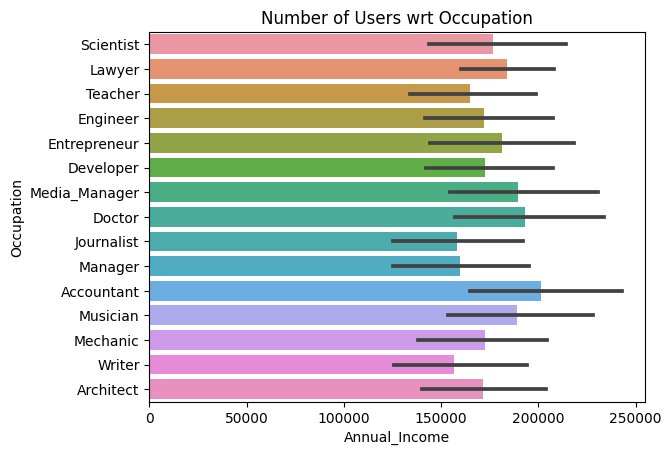

In [250]:
sns.barplot(data=data,y = 'Occupation',x="Annual_Income").set_title("Number of Users wrt Occupation")
plt.show()

In [267]:
data.groupby(['Occupation','Credit_Score']).mean(numeric_only=True)

Age  Annual_Income  Monthly_Inhand_Salary  \
Occupation    Credit_Score                                                    
Accountant    Good          37.267030  122125.469523            5172.929152   
              Poor          31.057797  185078.876519            3468.158614   
              Standard      33.828346  238109.049517            4307.746485   
Architect     Good          35.445642  190407.401208            5395.148207   
              Poor          31.765542  156903.003576            3354.374850   
              Standard      33.686036  172416.838211            4363.834296   
Developer     Good          36.234101  202726.510000            5293.281604   
              Poor          31.254325  185663.544288            3536.688457   
              Standard      33.421544  155620.192047            4108.646699   
Doctor        Good          37.014327  160427.742431            5006.700648   
              Poor          31.169250  109221.748301            3408.554567   
              Standard      32.840909  245137.459707            4192.172066   
Engineer      Good          35.864273  248262.134159            5281.360935   
              Poor          30.906517  141550.890401            3577.753070   
              Standard      32.453768  162359.781542            4245.004319   
Entrepreneur  Good          36.054131  194650.571629            5234.024605   
              Poor          30.786876  133474.539512            3665.149009   
              Standard      33.967287  205278.634952            4236.740973   
Journalist    Good          38.164912  164135.134794            4942.939024   
              Poor          31.527695  112618.410497            3549.668259   
              Standard      33.704244  180901.148053            3980.321250   
Lawyer        Good          36.549314  195789.581608            5052.790726   
              Poor          31.098742  195710.501397            3444.981075   
              Standard      33.854164  174182.774749            4237.508553   
Manager       Good          35.202639  118175.156136            5195.837384   
              Poor          30.844233  209550.736141            3676.165742   
              Standard      33.221606  146410.769763            4284.797477   
Mechanic      Good          37.497980  239912.510460            5452.998646   
              Poor          31.528486  106561.984240            3361.982483   
              Standard      33.519290  189064.838088            4217.033989   
Media_Manager Good          35.990257  153205.724212            5064.633139   
              Poor          31.039228  133797.978229            3414.269830   
              Standard      33.249325  228204.266382            4330.856261   
Musician      Good          37.598330  205883.030608            5499.979591   
              Poor          31.754902  173071.848483            3552.971705   
              Standard      33.182295  191503.340892            4182.398071   
Scientist     Good          35.168950  286779.748210            5424.773951   
              Poor          31.652361  161037.844069            3596.691685   
              Standard      33.894737  147643.082803            4227.771096   
Teacher       Good          35.037668  102159.734646            4986.693317   
              Poor          30.555676  167148.103194            3464.183413   
              Standard      33.044294  186442.495755            4216.716684   
Writer        Good          37.051597  165336.083759            5349.884049   
              Poor          31.302594  114372.899040            3517.827351   
              Standard      33.359649  177616.185847            4358.149960   

                            Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
Occupation    Credit_Score                                                      
Accountant    Good                  13.664850        28.064487      82.264305   
              Poor                  20.655398        23.327154      64.654853

<Axes: xlabel='Num_of_Delayed_Payment', ylabel='Occupation'>

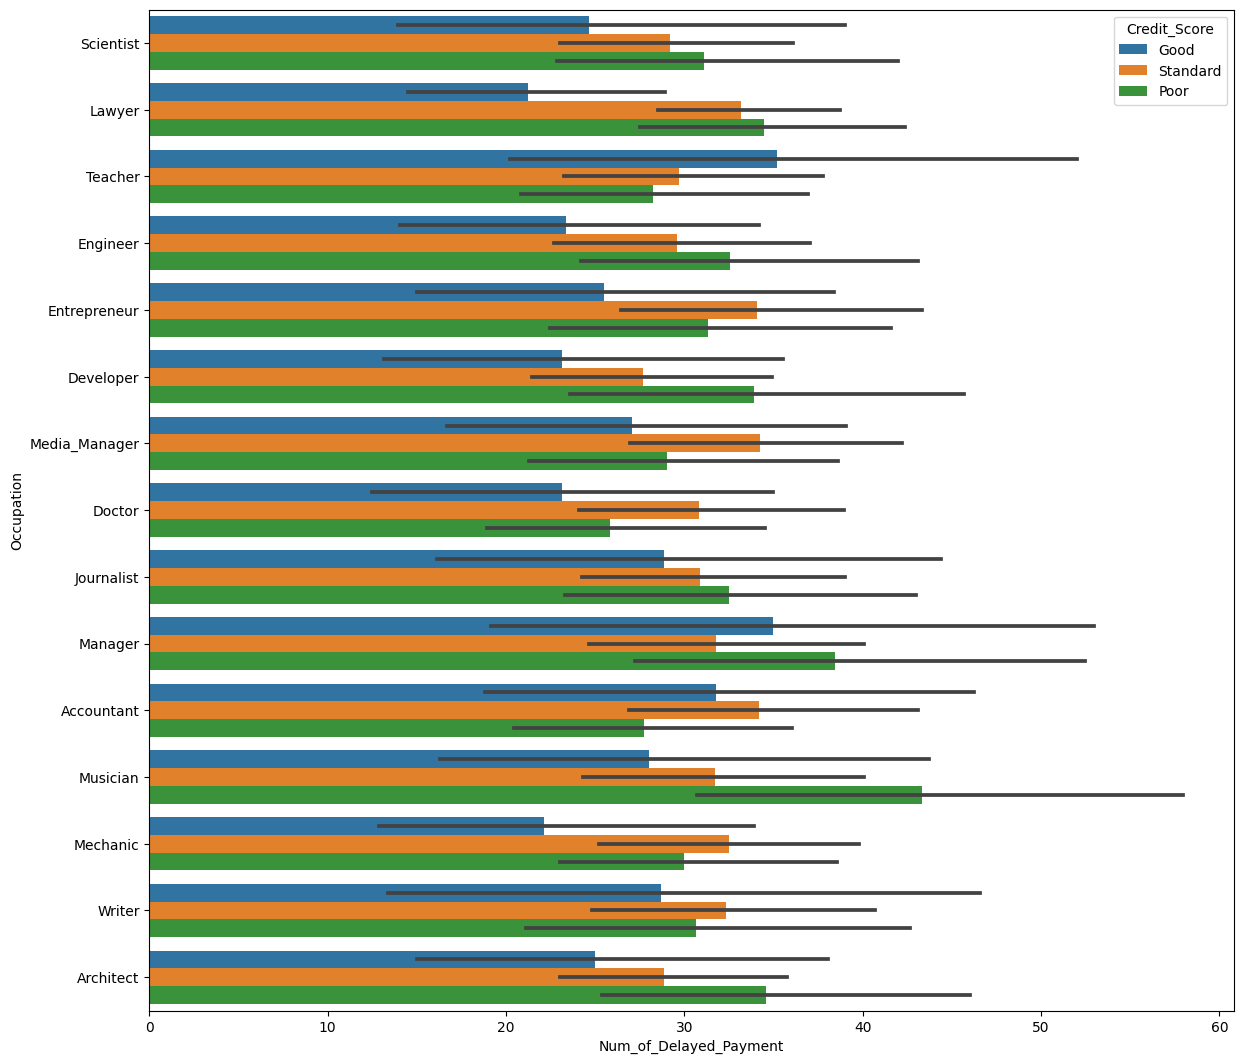

In [272]:
plt.figure(figsize=(14,13))
sns.barplot(data=data,y="Occupation",x="Num_of_Delayed_Payment",hue="Credit_Score")

,column,No of Unique Values,Values
0,Month,8,"[August, March, July, May, June, April, Januar..."
1,Occupation,15,"[Lawyer, Architect, Engineer, Scientist, Accou..."
2,Type_of_Loan,6260,"[Not Specified, Credit-Builder Loan, Personal ..."
3,Credit_Mix,3,"[Standard, Good, Bad]"
4,Credit_History_Age,404,"[15 Years and 11 Months, 15 Years and 9 Months..."
5,Payment_of_Min_Amount,3,"[Yes, No, NM]"
6,Payment_Behaviour,7,"[Low_spent_Small_value_payments, High_spent_Me..."
7,Credit_Score,3,"[Standard, Poor, Good]"


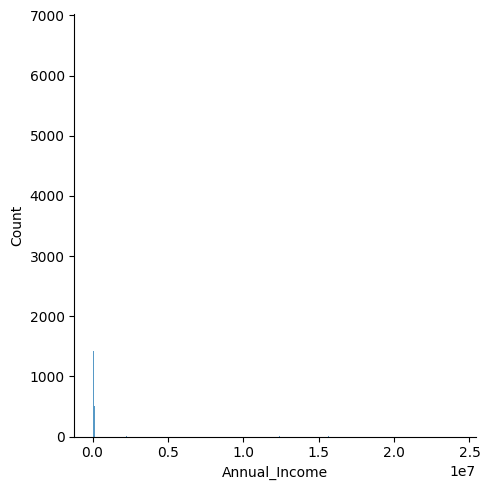

In [276]:
sns.displot(data=data,x="Annual_Income")